In [47]:
import numpy as np, pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from pymystem3 import Mystem
import nltk
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/andreyzakharov/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['hstack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [48]:
data = pd.read_csv('X_train.csv', sep=',', engine='python', encoding='utf-8', error_bad_lines=False)
data['comment'] = data['comment'].fillna('')
data['commentNegative'] = data['commentNegative'].fillna('')
data['commentPositive'] = data['commentPositive'].fillna('')
data['reting'] = data['reting'].astype(int)
data['date'] = data['date'].astype(np.datetime64)
data.head()

/Users/andreyzakharov/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


,sku,categoryLevel1Id,categoryLevel2Id,brandId,property,userName,reting,date,comment,commentNegative,commentPositive
0,20005023,401,4010201,826,"[{34: 'f982777489055c6563d68c005fd24aad'}, {36...",b2898a81b45310b30beb8fc0c0a9ce1e,2,2013-06-28,"2,5 года работала и все...устала! Лампочка гор...",,
1,20020647,403,4030101,1425,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",538c73d64461e13907bb95c51c38bfbc,2,2010-07-04,Через 2 месяца после истечении гарантийного ср...,,
2,20020701,401,4010401,124,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",ddca2d0101513a6209db7868eed8be05,4,2010-05-27,пользуюсь уже три недели. нареканий ни каких н...,,
3,30012256,203,2030301,93,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",289c20015b3713a82ba5ddf774d996f7,5,2016-10-11,Ребят этот системный блок подойдёт для игры кс...,,
4,30011341,205,2050201,656,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",5576f82d149d4f688644fef2322c63ef,5,2010-02-26,"я считаю, что яри замечательный телефон! Прият...",,


In [49]:
data.shape

(15587, 11)

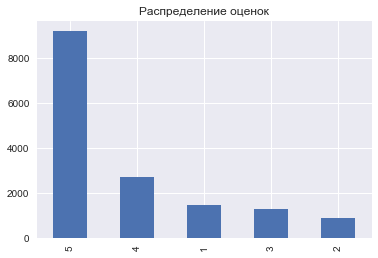

In [50]:
data['reting'].value_counts().plot(kind='bar')
plt.title('Распределение оценок');

In [51]:
mystem = Mystem()
def make_lemma(sentence):
    res = ' '.join([mystem.lemmatize(word)[0] for word in sentence.split()])
    return res

In [52]:
sentences = data['comment'] +' ' + data['commentNegative'] +' ' + data['commentPositive']
sentences = sentences.str.lower().apply(make_lemma)
sentences[0]

'2 год работать и все лампочка гореть и больше ничего'

In [58]:
stop_words= nltk.corpus.stopwords.words('russian')
vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 1), stop_words=stop_words)
features = vectorizer.fit_transform(sentences)

In [59]:
X, y = features, data['reting']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [60]:
X_train.shape

(10910, 24751)

In [61]:
model = RandomForestClassifier(max_depth=120, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=120, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [62]:
res = accuracy_score(y_test, model.predict(X_test))
res

0.60615779345734444